In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
from flask import Flask, jsonify

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)
conn=engine.connect()

In [7]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [8]:
# reflect an existing database into classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station
# reflect the tables
engine.table_names()

<ipython-input-8-76e86f098fd3>:7: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['measurement', 'station']

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# # Use Inspector to print the column names and types
columns = inspector.get_columns('measurement')
for c in columns:
     print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Save references to each table
measurement_df=pd.read_sql('select * from measurement',conn)
measurement_df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [13]:
station_df=pd.read_sql('select * from station',conn)
station_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [15]:
#

session.query(func.count(Measurement.date)).all()

[(19550,)]

In [16]:
# Latest Date
recentdatestr = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recentdatestr

('2017-08-23',)

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

recentdate=dt.datetime.strptime(recentdatestr[0], '%Y-%m-%d')
querydate = dt.date(recentdate.year -1, recentdate.month, recentdate.day)
#querydate
data = [Measurement.date,Measurement.prcp]
#data
querydata = session.query(*data).filter(Measurement.date >= querydate).all()
#precipitation
prcp_df = pd.DataFrame(querydata, columns=['Date','Precipitation'])
prcp_df = prcp_df.dropna(how='any') # drop non value entries
prcp_df = prcp_df.sort_values(["Date"], ascending=True)
prcp_df = prcp_df.set_index("Date")
prcp_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


In [18]:
querydata

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

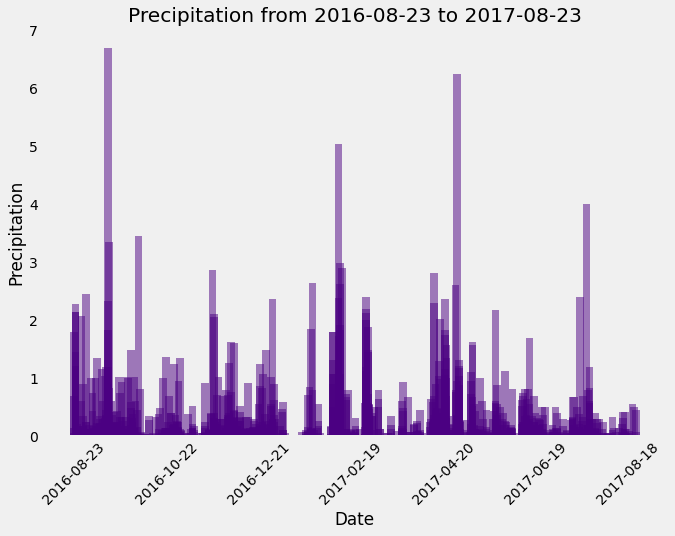

In [50]:
# Use Pandas Plotting with Matplotlib to plot the data

x_axis = prcp_df.index.tolist()
y_axis = prcp_df['Precipitation'].tolist()

plt.figure(figsize=(10,7))
plt.bar(x_axis,y_axis,width = 5 ,color='indigo', alpha=0.5, align="center",label='Precipitation')
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False) # labels along the bottom edge are off
major_ticks = np.arange(0,400,60)
plt.xticks(major_ticks,rotation = 45)

plt.title(f"Precipitation from {querydate} to {recentdatestr[0]}")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.grid(which='major', axis='both', linestyle='-')
plt.savefig("images/precipitation.PNG")
plt.show()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
#save it as excel
prcp_df['Precipitation'].describe().to_csv("images/precipitation.csv")
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station).count()
print(stations)

9


In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
activestations= session.query(Measurement.station,func.count(Measurement.station)).\
                group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
Most_Active = activestations[0][0]
activestations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
Most_Active

'USC00519281'

In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
tobsdata = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
mostactivestationdata = session.query(*tobsdata).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).first()
mostactivestationdata

(54.0, 85.0, 71.66378066378067)

In [25]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

queryresult = session.query(Measurement.tobs).\
    filter(Measurement.station == activestations[0][0]).\
    filter(Measurement.date >= querydate).all()
temp_df = pd.DataFrame(queryresult)

station_data = [Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation]
queryresult = session.query(*station_data).all()
stations_desc = pd.DataFrame(queryresult, columns=['Station','Name','Latitude','Longitude','Elevation'])

#station_name = stations_desc.loc[stations_desc["Station"] == activestations[0][0],"Name"].tolist()
station_name = stations_desc.loc[stations_desc["Station"] == activestations[0][0],"Name"].tolist()[0]
station_name


'WAIHEE 837.5, HI US'

In [26]:
queryresult

[('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [27]:
temp_df

,0
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


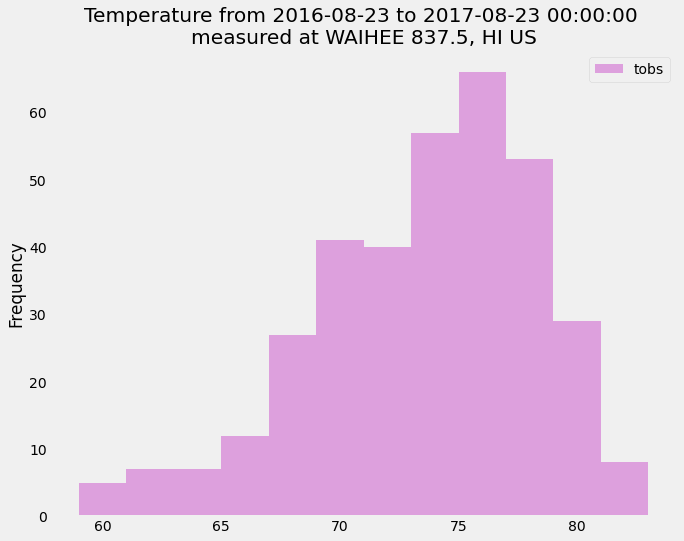

In [52]:
plt.hist(temp_df, bins=12,rwidth=1.0,label='tobs', color ='plum')
plt.grid(axis='both', alpha=0.75)
plt.ylabel('Frequency')
plt.title(f"Temperature from {querydate} to {recentdate} \nmeasured at {station_name}")
plt.legend()

plt.savefig("images/Station.png")

## Bonus Challenge Assignment

In [29]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [30]:
#Trip Dates and the previous year dates
trip_start = '2017-06-11'
trip_end = '2017-06-26'
trip_sdate = dt.datetime.strptime(trip_start, '%Y-%m-%d')
trip_edate=dt.datetime.strptime(trip_end, '%Y-%m-%d')
prevyr_trip_sdate = dt.date(trip_sdate.year -1, trip_sdate.month, trip_sdate.day)
prevyr_trip_edate = dt.date(trip_edate.year-1, trip_edate.month, trip_edate.day)

print(f'Holiday Trip start from {trip_start} until {trip_end}.\n Dates to analyze will be {prevyr_trip_sdate} to {prevyr_trip_edate}.')

Holiday Trip start from 2017-06-11 until 2017-06-26.
 Dates to analyze will be 2016-06-11 to 2016-06-26.


In [31]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates

tempcal = calc_temps(prevyr_trip_sdate,prevyr_trip_edate)
tempcal

[(69.0, 76.125, 81.0)]

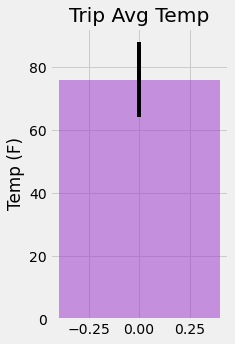

In [49]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

tempmin = tempcal[0][0]
tempavg = tempcal[0][1]
tempmax = tempcal[0][2]
yerr = tempmax-tempmin
plt.figure(figsize = (3.5, 5))
plt.bar(0, tempavg, yerr = yerr, color = "darkorchid", align="center",alpha = 0.5)
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.tight_layout()

plt.savefig("images/temperature.PNG")
plt.show()

In [33]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
select_date = [Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation,func.sum(Measurement.prcp)]
queryresult = session.query(*select_date).\
    filter(Station.station == Measurement.station).\
    group_by(Measurement.station).\
    filter(Measurement.date >= prevyr_trip_sdate).\
    filter(Measurement.date <= prevyr_trip_edate).\
    order_by(func.sum(Measurement.prcp).desc()).\
    all()
   
tot_rainfall_stations= pd.DataFrame(queryresult, columns=['Station','Name','Latitude','Longitude','Elevation','PrcpSum'])
tot_rainfall_stations

,Station,Name,Latitude,Longitude,Elevation,PrcpSum
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,8.85
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,3.96
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,2.22
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,1.90
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.80
5,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.60
6,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.13


In [34]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [38]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

trip_start = '2017-06-11'
trip_end = '2017-06-26'
trip_sdate = dt.datetime.strptime(trip_start, '%Y-%m-%d')
trip_edate=dt.datetime.strptime(trip_end, '%Y-%m-%d')

# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date

tripdates = []
normals =[]
while (trip_sdate <= trip_edate):
    #tripdates.append(dt.datetime.strftime(trip_sdate,'%m-%d'))
    datestr = dt.datetime.strftime(trip_sdate,'%m-%d')
    tripdates.append(datestr)
    normals.append(list(np.ravel(daily_normals(datestr))))
    trip_sdate = trip_sdate + dt.timedelta(days = 1)

normals
#tripdates

[[69.0, 76.01960784313725, 84.0],
 [66.0, 75.66666666666667, 83.0],
 [68.0, 75.66666666666667, 81.0],
 [69.0, 75.62711864406779, 81.0],
 [67.0, 75.40350877192982, 81.0],
 [69.0, 75.41379310344827, 81.0],
 [68.0, 74.59322033898304, 81.0],
 [69.0, 74.60344827586206, 80.0],
 [70.0, 75.44067796610169, 82.0],
 [68.0, 73.96491228070175, 85.0],
 [68.0, 74.75862068965517, 82.0],
 [69.0, 75.15789473684211, 81.0],
 [68.0, 74.54385964912281, 80.0],
 [68.0, 74.96428571428571, 84.0],
 [68.0, 74.10344827586206, 80.0],
 [67.0, 74.21428571428571, 82.0]]

In [39]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_normal= pd.DataFrame(normals, columns=['tmin','tavg','tmax'])
trip_normal['Date'] = tripdates
trip_normal = trip_normal.set_index("Date")
trip_normal

,tmin,tavg,tmax
Date,,,
06-11,69.0,76.019608,84.0
06-12,66.0,75.666667,83.0
06-13,68.0,75.666667,81.0
06-14,69.0,75.627119,81.0
06-15,67.0,75.403509,81.0
06-16,69.0,75.413793,81.0
06-17,68.0,74.593220,81.0
06-18,69.0,74.603448,80.0
06-19,70.0,75.440678,82.0


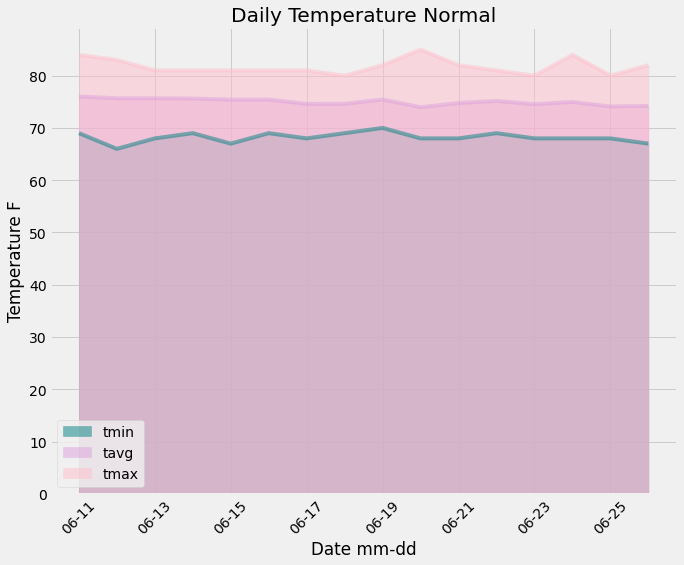

In [40]:
# Plot the daily normals as an area plot with `stacked=False`
plt.rcParams["figure.figsize"] = (10,8)
colors=["teal","plum","pink"]
trip_normal.plot.area(stacked=False,color=colors)

plt.xticks(rotation=45)
plt.title("Daily Temperature Normal")
plt.xlabel("Date mm-dd")
plt.ylabel("Temperature F")
plt.savefig("images/daily_normal.png")
plt.show()